In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
Data = pd.read_csv("currencies.txt",header=None)

In [7]:
Data.columns = ["Variance","Skewness","Kurtosis","Entropy","Authenticity"]
Data.head()



,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
print(Data.info)

<bound method DataFrame.info of       Variance  Skewness  Kurtosis  Entropy  Authenticity
0      3.62160   8.66610   -2.8073 -0.44699             0
1      4.54590   8.16740   -2.4586 -1.46210             0
2      3.86600  -2.63830    1.9242  0.10645             0
3      3.45660   9.52280   -4.0112 -3.59440             0
4      0.32924  -4.45520    4.5718 -0.98880             0
...        ...       ...       ...      ...           ...
1367   0.40614   1.34920   -1.4501 -0.55949             1
1368  -1.38870  -4.87730    6.4774  0.34179             1
1369  -3.75030 -13.45860   17.5932 -2.77710             1
1370  -3.56370  -8.38270   12.3930 -1.28230             1
1371  -2.54190  -0.65804    2.6842  1.19520             1

[1372 rows x 5 columns]>


In [10]:
# Data Visualization
# Blue - Legit Note / Orange - defraud Note 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


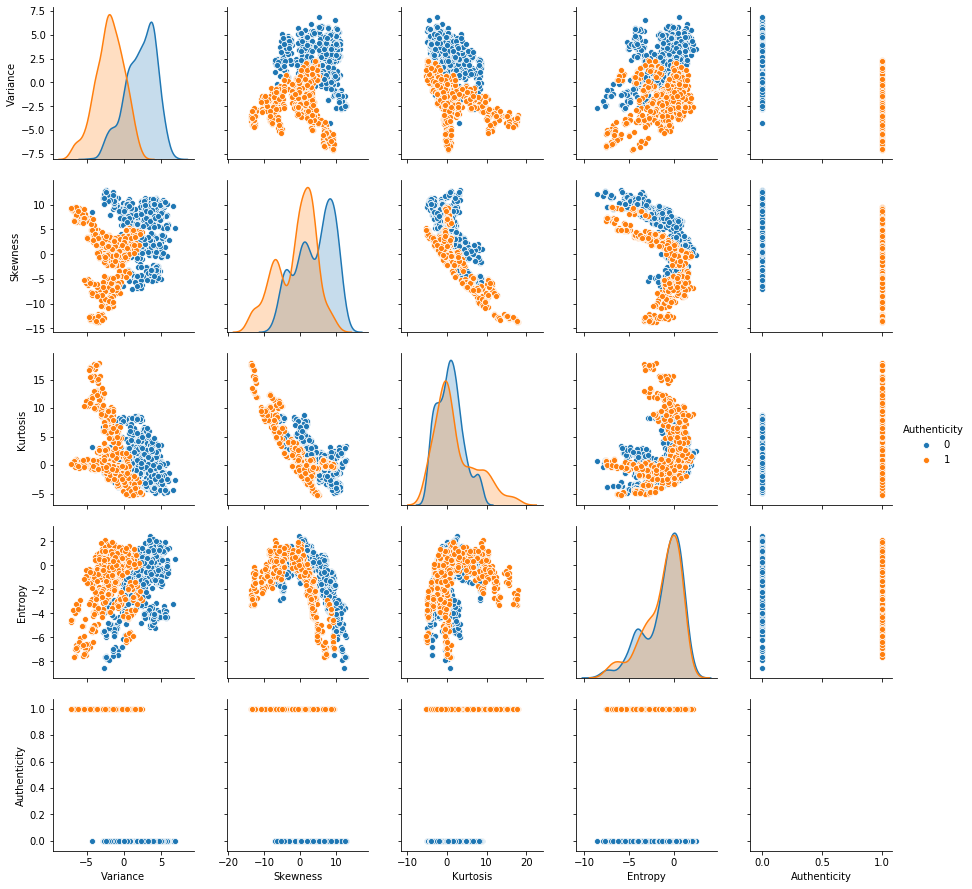

In [9]:
sns.pairplot(Data,hue="Authenticity")
plt.show()

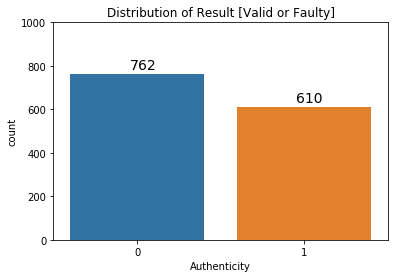

In [27]:
plt.figure()
plt.title("Distribution of Result [Valid or Faulty]")
sns.countplot(x=Data['Authenticity'])
target_score=  Data.Authenticity.value_counts()
plt.annotate(s=target_score[0], xy=(-0.04,25+target_score[0]), size=14)
plt.annotate(s=target_score[1], xy=(0.95,25+target_score[1]), size=14)
plt.ylim(0,1000)
plt.show()


In [29]:
#lets make both samples equal ie ( deleting extra valid notes)

In [28]:
Data_deleted = target_score[0] - target_score[1]
Data = Data.sample(frac=1, random_state=42).sort_values(by='Authenticity')
Data= Data[Data_deleted:]
print(Data['Authenticity'].value_counts())

1    610
0    610
Name: Authenticity, dtype: int64


In [30]:
# Data Modleling 

In [33]:
X = Data.loc[:,Data.columns != 'Authenticity']
Y = Data.loc[:,Data.columns == 'Authenticity']
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [35]:
# standardizing the data using Standardscalar method

In [34]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [36]:
#Logistic Regression 

In [37]:
Predict = LogisticRegression(solver ='lbfgs',random_state=42, multi_class='auto')
Predict.fit(x_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#Testing Accuracy

In [42]:
y_predict = np.array(Predict.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_predict),
                        columns=["Predicted . Negative", "Predicted . Positive"],
                        index=['Actual . Negative', "Actual . Positive"])

In [45]:
#calulations 
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

                   Predicted . Negative  Predicted . Positive
Actual . Negative                   251                     6
Actual . Positive                     0                   231

 Accuracy = 98.77%


In [55]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
acc= accuracy_score(y_test, y_predict)
print(f'\n Accuracy with metric = {round(100*acc,2)}%')


 Accuracy with metric = 98.77%


In [56]:
#Simulation for new note

In [61]:
New_note = np.array([4.5,-8.1,2.4,1.4],ndmin=2)
New_note = scalar.transform(New_note)
print(f'Prediction:  Class {Predict.predict(New_note)[0]}')
print(f'Probability [0/1]:  {Predict.predict_proba(New_note)[0]}')


Prediction:  Class 0
Probability [0/1]:  [0.58517656 0.41482344]


#Thus , we predicted that the note is real as the probablity of being real is more than being faulty.